## Logisztikus regresszió példa

* Diabétesz adathalmazon tanítva és tesztelve
* A személy különböző orvosi adatai milyen összefüggésben vannak a diabétesz betegséggel

In [21]:
## megfelelő köyvtárak importálása
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [22]:
# diabétesz adathalmaz előkészítése

df = pd.read_csv('data/diabetes[1].csv')

# itt is egyszerű adattisztítás (hiányos, duplikált mezők)

df = df.dropna()
df = df.drop_duplicates()

In [23]:
# tanító (80%) és teszthalmaz (20%) előkészítése

y_true = df["Outcome"]
X = df.drop(columns=["Outcome"])

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y_true, train_size=0.8, test_size=0.2, random_state=42
)

In [24]:
# modell definiálása és tanítása

model = LogisticRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

/home/csanadl/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# kiértékelés

report = classification_report(Y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



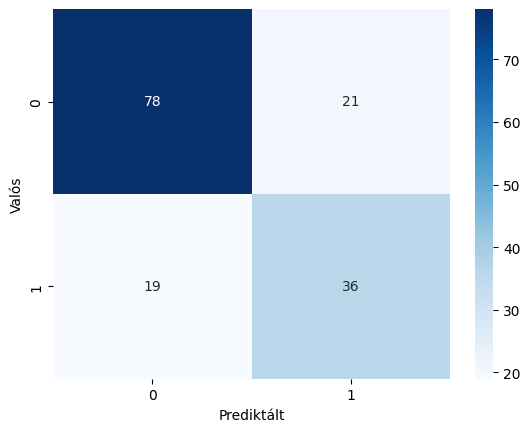

In [26]:
# vizualizálás (heatmap)

cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediktált")
plt.ylabel("Valós")
plt.show()